# Exercise 2.2:
What is the most “central” EU capital, i.e., the one with the lowest average Earth distance with the other EU capitals?
*   Create a bar chart with the average distance for each EU capital, sorted in increasing order
*   Repeat the exercise for at least another continent
*   Submit a (well-documented) python notebook


In [1]:
#installing random library with EU country names (lazy)
!pip install countrygroups

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing the data
Using the same data as in the previous exercise (everything is almost the same until the section "Computing the distances")

In [2]:
from countrygroups import EUROPEAN_UNION
import urllib.request
import json

file_name = 'capitals.json'

#downloading a json with the latitude and longitudes of world capitals
urllib.request.urlretrieve('http://techslides.com/demos/country-capitals.json', file_name)

#importing the json file
with open(file_name, 'r') as f:
    data = json.loads(f.read())

In [3]:
EU_countries = EUROPEAN_UNION.names 
#a quick check made it clear Czechia had to be fixed to match the other json
EU_countries.remove('Czechia')
EU_countries.append('Czech Republic')

In [4]:
#extracting the EU capitals from the json
EU_capitals = [capital for capital in data if capital['CountryName'] in EU_countries]
EU_capitals

[{'CountryName': 'Austria',
  'CapitalName': 'Vienna',
  'CapitalLatitude': '48.2',
  'CapitalLongitude': '16.366667',
  'CountryCode': 'AT',
  'ContinentName': 'Europe'},
 {'CountryName': 'Belgium',
  'CapitalName': 'Brussels',
  'CapitalLatitude': '50.833333333333336',
  'CapitalLongitude': '4.333333',
  'CountryCode': 'BE',
  'ContinentName': 'Europe'},
 {'CountryName': 'Bulgaria',
  'CapitalName': 'Sofia',
  'CapitalLatitude': '42.68333333333333',
  'CapitalLongitude': '23.316667',
  'CountryCode': 'BG',
  'ContinentName': 'Europe'},
 {'CountryName': 'Croatia',
  'CapitalName': 'Zagreb',
  'CapitalLatitude': '45.8',
  'CapitalLongitude': '16.000000',
  'CountryCode': 'HR',
  'ContinentName': 'Europe'},
 {'CountryName': 'Cyprus',
  'CapitalName': 'Nicosia',
  'CapitalLatitude': '35.166666666666664',
  'CapitalLongitude': '33.366667',
  'CountryCode': 'CY',
  'ContinentName': 'Europe'},
 {'CountryName': 'Czech Republic',
  'CapitalName': 'Prague',
  'CapitalLatitude': '50.08333333333

In [5]:
#just a quick check if they are those 27
assert len([x['CountryName'] for x in EU_capitals]) == 27, 'There are not 27 countries!'
set(EU_countries) == set([x['CountryName'] for x in EU_capitals])

True

In [6]:
#making the capital lat and lon from strings to floats
for capital in EU_capitals:
    capital['CapitalLatitude'] = float(capital['CapitalLatitude'])
    capital['CapitalLongitude'] = float(capital['CapitalLongitude'])

#making the data easier to call (a dictionary to call from the capital)
EU_capdict = {x['CapitalName'] : x for x in EU_capitals}
EU_capdict

{'Vienna': {'CountryName': 'Austria',
  'CapitalName': 'Vienna',
  'CapitalLatitude': 48.2,
  'CapitalLongitude': 16.366667,
  'CountryCode': 'AT',
  'ContinentName': 'Europe'},
 'Brussels': {'CountryName': 'Belgium',
  'CapitalName': 'Brussels',
  'CapitalLatitude': 50.833333333333336,
  'CapitalLongitude': 4.333333,
  'CountryCode': 'BE',
  'ContinentName': 'Europe'},
 'Sofia': {'CountryName': 'Bulgaria',
  'CapitalName': 'Sofia',
  'CapitalLatitude': 42.68333333333333,
  'CapitalLongitude': 23.316667,
  'CountryCode': 'BG',
  'ContinentName': 'Europe'},
 'Zagreb': {'CountryName': 'Croatia',
  'CapitalName': 'Zagreb',
  'CapitalLatitude': 45.8,
  'CapitalLongitude': 16.0,
  'CountryCode': 'HR',
  'ContinentName': 'Europe'},
 'Nicosia': {'CountryName': 'Cyprus',
  'CapitalName': 'Nicosia',
  'CapitalLatitude': 35.166666666666664,
  'CapitalLongitude': 33.366667,
  'CountryCode': 'CY',
  'ContinentName': 'Europe'},
 'Prague': {'CountryName': 'Czech Republic',
  'CapitalName': 'Prague',

## Doing the math

In [7]:
from math import cos, sin, asin, sqrt, pi

def to_radians(*args): #I needed radians to work with trigonometry
    for raw in args:
        yield raw*(pi/180) #I made it a generator out of convenience

assert round(next(to_radians(1)), 5) == 0.01745, "It's not equal to the proper conversion of degree to radians"

<font size="4">Earth Distances</font>

In [8]:
def haversine_formula(latP, lonP, latQ, lonQ):
    #converting the latitude and longitudes to radians
    latP, lonP, latQ, lonQ = tuple(to_radians(latP, lonP, latQ, lonQ))
    #print(latP, lonP, latQ, lonQ)

    earth_radius = 6371 #km, from wikipedia

    Dlat = latQ - latP
    Dlon = lonQ - lonP

    #I copied and translated the formula to python
    to_sqrt = sin(Dlat/2)**2 + cos(latP)*cos(latQ)*sin(Dlon/2)**2
    d = 2*earth_radius*asin(sqrt(to_sqrt))

    return  d

In [9]:
#testing the formula
assert round(
             haversine_formula(43.7228555,  #Pisa Tower Latitude
                               10.3963002, #Pisa Tower Longitude
                               EU_capdict['Valletta']['CapitalLatitude'],
                               EU_capdict['Valletta']['CapitalLongitude']), 
             
             0) == 939, 'Online calculator told me it was 939 km from la Valletta'

## Computing the distances (EU)

In [10]:
import matplotlib.pyplot as plt

Computing the distances <br>
<font size="4">I did as requested for the 5 largest EU cities but it is possible to look at them all by removing "five_largest: #"</font>

In [11]:
earth_distdict = dict()

for capital in EU_capdict.keys(): #to get them all
    #setting the new capital latitude and longitudes
    latP = EU_capdict[capital]['CapitalLatitude']
    lonP = EU_capdict[capital]['CapitalLongitude']

    #creating a new dictionary to store the capitals compared and its relative distance
    earth_subdict = dict()
    
    for capital_to_compare in EU_capdict.keys():
        if capital != capital_to_compare: #to avoid computing distances from itself
            #setting the capital latitude and longitudes to compare
            latQ = EU_capdict[capital_to_compare]['CapitalLatitude']
            lonQ = EU_capdict[capital_to_compare]['CapitalLongitude']

            #computing earth distance between the two capitals
            earth_distance = haversine_formula(latP, lonP, latQ, lonQ)
            #adding the results to the sub dictionary
            earth_subdict[capital_to_compare] = earth_distance

    #adding the subdictionary to the main one
    earth_distdict[capital] = earth_subdict

Checking if everything is okay, the structure must be: <br>
Capital : Dictionary of distances of other capitals to the one considered

In [12]:
earth_distdict['Dublin']

{'Vienna': 1679.8675160979913,
 'Brussels': 772.2480195529654,
 'Sofia': 2471.3005457348922,
 'Zagreb': 1797.9733261946994,
 'Nicosia': 3675.248638678974,
 'Prague': 1465.4563669932443,
 'Copenhagen': 1238.9174122713985,
 'Tallinn': 2001.6194138257717,
 'Helsinki': 2023.8493292526518,
 'Paris': 775.4860205918371,
 'Berlin': 1315.205600005077,
 'Athens': 2852.113276955937,
 'Budapest': 1894.997431430677,
 'Rome': 1881.6944385784868,
 'Riga': 1952.8555347997685,
 'Vilnius': 2050.1941951672025,
 'Luxembourg': 948.5435754509507,
 'Valletta': 2521.1104005621623,
 'Amsterdam': 755.8963308439701,
 'Warsaw': 1824.2449420215498,
 'Lisbon': 1638.4651502214947,
 'Bucharest': 2535.2234543291615,
 'Bratislava': 1731.5136605691757,
 'Ljubljana': 1688.7472374524825,
 'Madrid': 1449.0514190000715,
 'Stockholm': 1627.8950731287516}

## Computing the average distances (EU)

In [13]:
average_distdict = dict()

for capital in earth_distdict.keys():
    values = list(earth_distdict[capital].values()) #extracting values from the subdictionary

    average_distance = sum(values) / len(values) #computing the average distance
    average_distdict[capital] = average_distance #adding that distance to the dictionary

In [14]:
average_distdict

{'Vienna': 987.0889767625157,
 'Brussels': 1216.3312748549556,
 'Sofia': 1369.8533707042156,
 'Zagreb': 1051.8195450870708,
 'Nicosia': 2379.2000076375575,
 'Prague': 986.8112883762086,
 'Copenhagen': 1202.6668088227777,
 'Tallinn': 1569.6881765518567,
 'Helsinki': 1633.387505511417,
 'Paris': 1311.0100264739713,
 'Berlin': 1045.288350548787,
 'Athens': 1716.5499463587182,
 'Budapest': 1043.7841174538719,
 'Dublin': 1791.1430119119746,
 'Rome': 1291.9526185186453,
 'Riga': 1391.2939771323936,
 'Vilnius': 1328.6340599059897,
 'Luxembourg': 1149.1492057503303,
 'Valletta': 1767.1122300051138,
 'Amsterdam': 1224.6805257772785,
 'Warsaw': 1116.3413590967589,
 'Lisbon': 2397.44534417502,
 'Bucharest': 1399.9016883017184,
 'Bratislava': 994.5302569498264,
 'Ljubljana': 1042.7933500190072,
 'Madrid': 1970.8909492376993,
 'Stockholm': 1458.8641940655425}

In [15]:
# Here I sorted in ascending order according to the average distances
average_distlist = sorted(average_distdict.items(), key = lambda x : x[1])
average_distlist

[('Prague', 986.8112883762086),
 ('Vienna', 987.0889767625157),
 ('Bratislava', 994.5302569498264),
 ('Ljubljana', 1042.7933500190072),
 ('Budapest', 1043.7841174538719),
 ('Berlin', 1045.288350548787),
 ('Zagreb', 1051.8195450870708),
 ('Warsaw', 1116.3413590967589),
 ('Luxembourg', 1149.1492057503303),
 ('Copenhagen', 1202.6668088227777),
 ('Brussels', 1216.3312748549556),
 ('Amsterdam', 1224.6805257772785),
 ('Rome', 1291.9526185186453),
 ('Paris', 1311.0100264739713),
 ('Vilnius', 1328.6340599059897),
 ('Sofia', 1369.8533707042156),
 ('Riga', 1391.2939771323936),
 ('Bucharest', 1399.9016883017184),
 ('Stockholm', 1458.8641940655425),
 ('Tallinn', 1569.6881765518567),
 ('Helsinki', 1633.387505511417),
 ('Athens', 1716.5499463587182),
 ('Valletta', 1767.1122300051138),
 ('Dublin', 1791.1430119119746),
 ('Madrid', 1970.8909492376993),
 ('Nicosia', 2379.2000076375575),
 ('Lisbon', 2397.44534417502)]

Text(0.5, 1.0, 'Average Distances of each EU Capital to all the others')

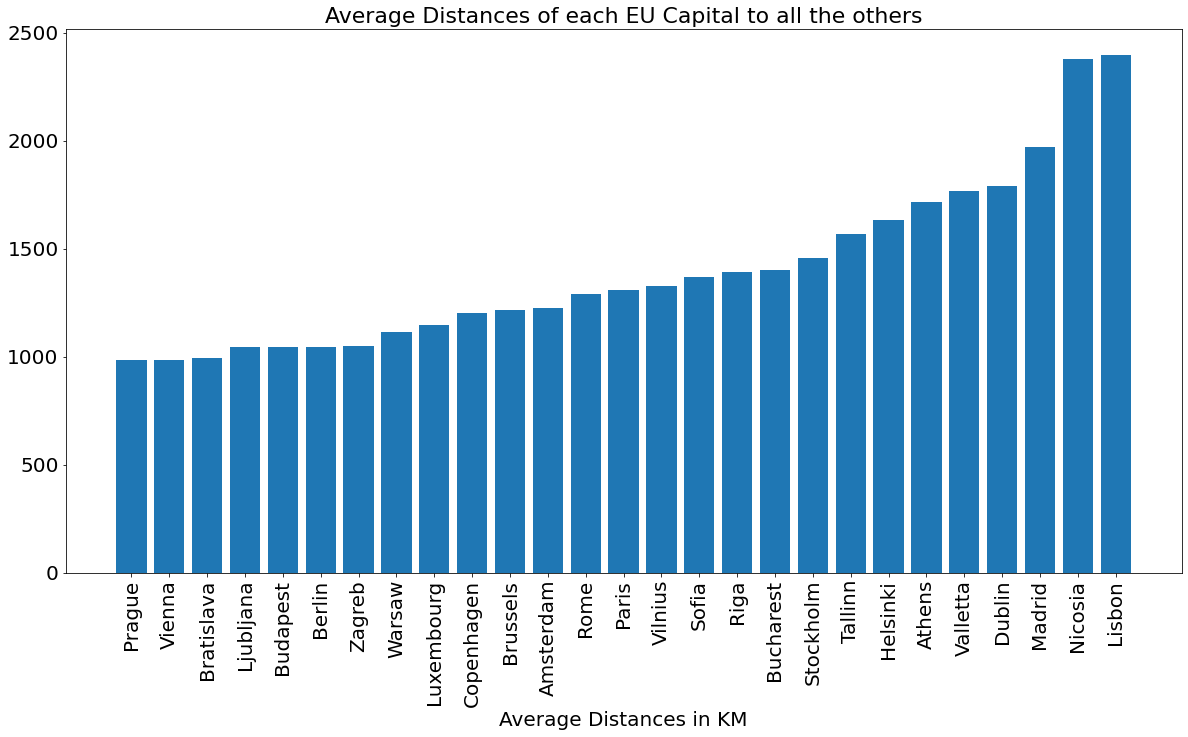

In [16]:
#plotting the previous list (Prague is the winner)
plt.figure(figsize=(20,10))
fontsize = 20
names = [x[0] for x in average_distlist]
values = [x[1] for x in average_distlist]
plt.bar(names, values)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(rotation=90) # It wouldn't be readable otherwise
plt.ylabel('Average Distances in KM', fontsize=fontsize)
plt.title('Average Distances of each EU Capital to all the others', fontsize=fontsize+2)

## Most central capital in Asia


In [17]:
#getting the asian capital data
Asian_capitals = [capital for capital in data if capital['ContinentName'] in 'Asia']

As expected some of them are counted as European for cultural reasons, I will count them in asia if they have their capital there, thus I will add (excluding only Russia):
Turkey, Georgia, Armenia, Azerbaijan, Cyprus

In [18]:
for cap in data:
    if cap['CountryName'] in ['Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Cyprus']:
        Asian_capitals.append(cap)

In [19]:
#looking for inconsistences in the data (N/A)
for x in Asian_capitals:
    if x['CapitalName'] == 'N/A':
        print(x)

{'CountryName': 'Hong Kong', 'CapitalName': 'N/A', 'CapitalLatitude': '0', 'CapitalLongitude': '0.000000', 'CountryCode': 'HK', 'ContinentName': 'Asia'}
{'CountryName': 'Macau', 'CapitalName': 'N/A', 'CapitalLatitude': '0', 'CapitalLongitude': '0.000000', 'CountryCode': 'MO', 'ContinentName': 'Asia'}


NB: Jerusalem is considered both the capital of the State of Palestine and the capital of Israel, for simplicity I will count it once (by assigning the capital key to the dictionary one wil be overwritten)

In [20]:
#making the capital lat and lon from strings to floats
for capital in Asian_capitals:
    capital['CapitalLatitude'] = float(capital['CapitalLatitude'])
    capital['CapitalLongitude'] = float(capital['CapitalLongitude'])

#making the data easier to call (a dictionary to call from the capital)
Asia_capdict = {x['CapitalName'] : x for x in Asian_capitals}
#removing Macau and Hong Kong as they are not capitals (one of them already overwritten)
del Asia_capdict['N/A']

#avoid controversies about its recognition, it wouldn't be in the center anyway, it would just move slightly eastward the center
del Asia_capdict['Taipei']

Asia_capdict

{'Jerusalem': {'CountryName': 'Israel',
  'CapitalName': 'Jerusalem',
  'CapitalLatitude': 31.766666666666666,
  'CapitalLongitude': 35.233333,
  'CountryCode': 'IL',
  'ContinentName': 'Asia'},
 'Kabul': {'CountryName': 'Afghanistan',
  'CapitalName': 'Kabul',
  'CapitalLatitude': 34.516666666666666,
  'CapitalLongitude': 69.183333,
  'CountryCode': 'AF',
  'ContinentName': 'Asia'},
 'Manama': {'CountryName': 'Bahrain',
  'CapitalName': 'Manama',
  'CapitalLatitude': 26.233333333333334,
  'CapitalLongitude': 50.566667,
  'CountryCode': 'BH',
  'ContinentName': 'Asia'},
 'Dhaka': {'CountryName': 'Bangladesh',
  'CapitalName': 'Dhaka',
  'CapitalLatitude': 23.716666666666665,
  'CapitalLongitude': 90.4,
  'CountryCode': 'BD',
  'ContinentName': 'Asia'},
 'Thimphu': {'CountryName': 'Bhutan',
  'CapitalName': 'Thimphu',
  'CapitalLatitude': 27.466666666666665,
  'CapitalLongitude': 89.633333,
  'CountryCode': 'BT',
  'ContinentName': 'Asia'},
 'Bandar Seri Begawan': {'CountryName': 'Brune

In [21]:
if len(Asia_capdict) == 47:
    print('OK')

OK


<font size="5">Now adapting the same code I wrote before to get the distance sorted plot (just substituted in the first ### ... ### block EU_capdict with Asia_capdict)</font>

Text(0.5, 1.0, 'Average Distances of each Asian Capital to all the others')

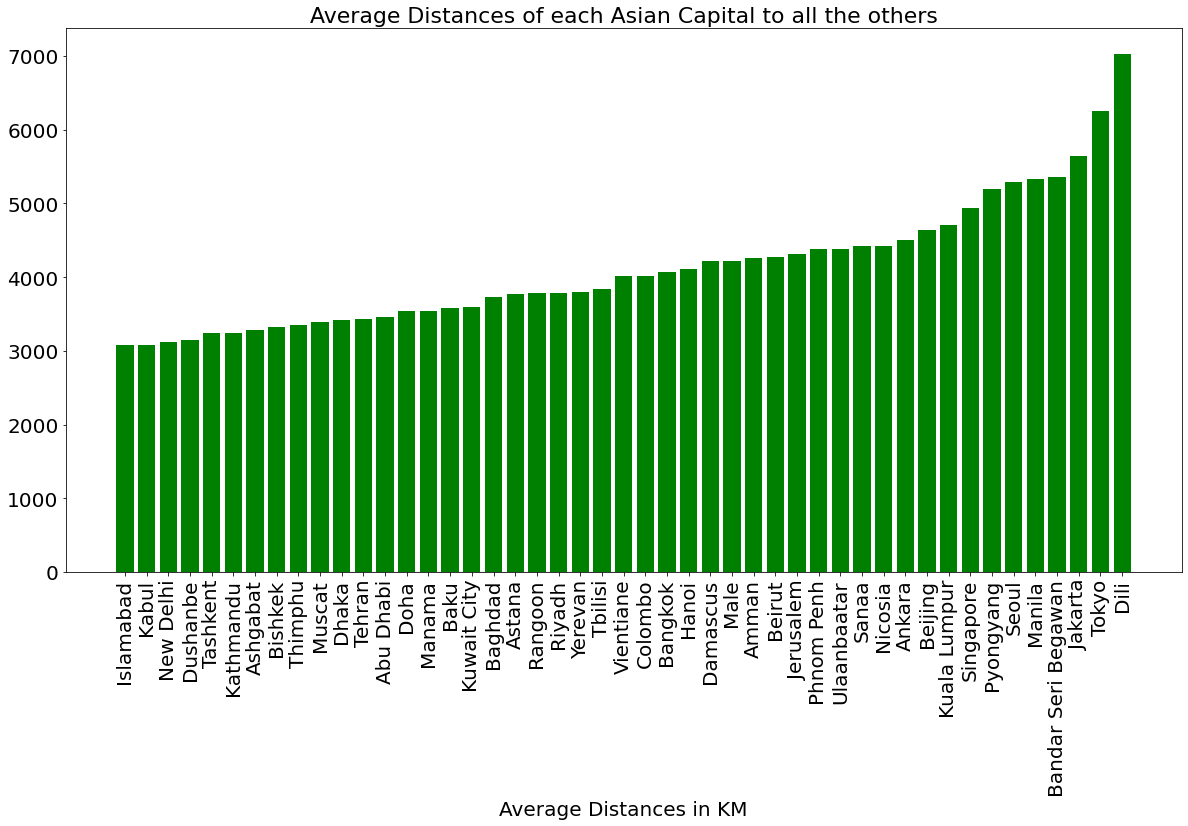

In [22]:
### COMPUTING DISTANCES FOR EACH CAPITAL IN ASIA ###
earth_distdict = dict()

for capital in Asia_capdict.keys():
    #setting the new capital latitude and longitudes
    latP = Asia_capdict[capital]['CapitalLatitude']
    lonP = Asia_capdict[capital]['CapitalLongitude']

    #creating a new dictionary to store the capitals compared and its relative distance
    earth_subdict = dict()
    
    for capital_to_compare in Asia_capdict.keys():
        if capital != capital_to_compare: #to avoid computing distances from itself
            #setting the capital latitude and longitudes to compare
            latQ = Asia_capdict[capital_to_compare]['CapitalLatitude']
            lonQ = Asia_capdict[capital_to_compare]['CapitalLongitude']

            #computing earth distance between the two capitals
            earth_distance = haversine_formula(latP, lonP, latQ, lonQ)
            #adding the results to the sub dictionary
            earth_subdict[capital_to_compare] = earth_distance

    #adding the subdictionary to the main one
    earth_distdict[capital] = earth_subdict

### FROM WHICH I COMPUTE AVERAGE DISTANCES FOR EACH CAPITAL IN ASIA ###
average_distdict = dict()

for capital in earth_distdict.keys():
    values = list(earth_distdict[capital].values()) #extracting values from the subdictionary

    average_distance = sum(values) / len(values) #computing the average distance
    average_distdict[capital] = average_distance #adding that distance to the dictionary
    

### SORTING THE LIST ###
# Here I sorted in ascending order according to the average distances (ascending now because I will plot horizontally)
average_distlist = sorted(average_distdict.items(), key = lambda x : x[1])
average_distlist

### PLOTTING THE RESULTS ###
plt.figure(figsize=(20,10))
fontsize = 20
names = [x[0] for x in average_distlist]
values = [x[1] for x in average_distlist]
plt.bar(names, values, color='Green')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(rotation=90) # It wouldn't be readable otherwise
plt.ylabel('Average Distances in KM', fontsize=fontsize)
plt.title('Average Distances of each Asian Capital to all the others', fontsize=fontsize+2)

<font size="5">Result: Prague is the centermost EU capital, Islamabad is the centermost Asian capital. <br> In both the EU and Asia the second centermost capitals (Vienna and Kabul) have very similar average distances to the first centermost capital</font>

